# Setup

In [1]:
# Set Up Environment
import pandas as pd
import numpy as np
import seaborn as sns
import time
from scipy.ndimage import gaussian_filter
from kaggle_environments import evaluate, make, FailedPrecondition
from kaggle_environments.envs.halite.helpers import Configuration, Board, Observation
from src.coordinates import P
from src.gamestate import GameState
%matplotlib inline
env = make("halite", configuration={ "episodeSteps": 500 }, debug=True)
config = Configuration(env.configuration)
print (env.configuration)
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 8]
# automatically reimport when file has changed NOT working 
%load_ext autoreload
%autoreload 2

{'episodeSteps': 500, 'agentExec': 'LOCAL', 'agentTimeout': 12, 'actTimeout': 6, 'runTimeout': 9600, 'startingHalite': 24000, 'size': 21, 'spawnCost': 500, 'convertCost': 500, 'moveCost': 0, 'collectRate': 0.25, 'regenRate': 0.02, 'maxCellHalite': 500}


# Import agent

In [2]:
from submission import agent
import submission

# Step by step debug

In [3]:
def debug_state(my_action, start_time=None):
    from pprint import pformat
    print(f"turn {GameState.board.step}")
    print("----action :", pformat(my_action))
    print("----positons:")
    for s in GameState.board.current_player.ships:
        print(s.id, s.position.norm)
    if start_time:
        print(f"Execution time: {(time.time() - start_time) / num_steps} seconds")

In [4]:
# reset game
submission.commander = None
trainer = env.train([None, "random"])
observation = trainer.reset()

In [7]:
# step
start_time = time.time()
num_steps = 10
try:
    for i in range(num_steps):
        my_action = agent(observation, env.configuration)
        observation, reward, done, info = trainer.step(my_action)
except FailedPrecondition:
    pass
    
env.render(mode="ipython", header=True, controls=True, width=650, height=550)
debug_state(my_action, start_time)

turn 29
----action : {}
----positons:
0-1 P(10, 5)
Execution time: 0.015284299850463867 seconds


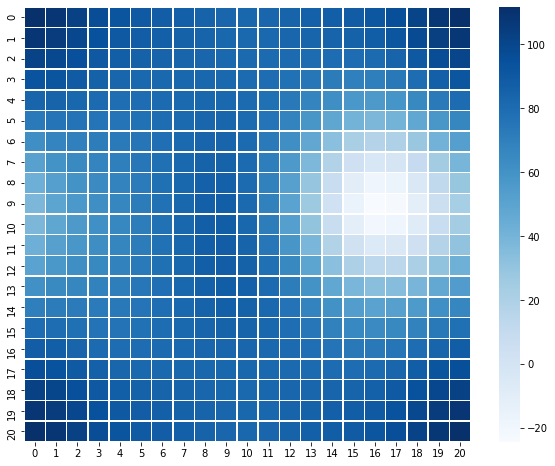

In [11]:
#sns.heatmap(submission.commander.threat_map, cmap='Reds_r', linewidths=0.5, annot=False)
sns.heatmap(submission.commander.expansion_map, cmap='Blues', linewidths=0.5, annot=False)
#sns.heatmap(submission.commander.objectives_map, cmap='Reds_r', linewidths=0.5, annot=False)
#sns.heatmap(submission.commander.reward_map, cmap='RdYlGn', linewidths=0.5, annot=False)
#pd.DataFrame(submission.commander.threat_map).style.background_gradient(cmap='Reds_r').format('{:03,.0f}')

# Manual input

In [ ]:
my_action = {
    '0-1': 'WEST',
}
observation, reward, done, info = trainer.step(my_action)
env.render(mode="ipython", header=True, controls=True, width=650, height=550)

# Run a game

In [ ]:
env.run([agent, "submission.py"])
env.render(mode="ipython", width=800, height=600)